In [6]:
import torch
import torchviz
import numpy as np

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
np.random.seed(42)
sz = 100
x = np.random.rand(sz, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(sz, 1)
idx = np.arange(sz)
np.random.shuffle(idx)
sz80 = int(sz * 0.8)
train_idx = idx[:sz80]
val_idx = idx[sz80:]
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [10]:
# setup

torch.manual_seed(42)
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

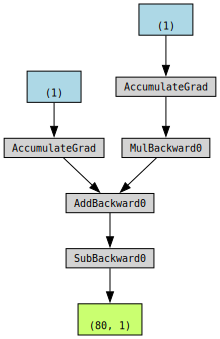

In [11]:
# error
torchviz.make_dot(error)

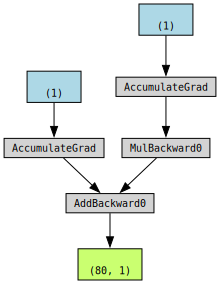

In [12]:
# yhat
torchviz.make_dot(yhat)

## Задание 1
- yhat: происходит инициализация параметра `a`, для `b` происходит инициализация и затем умножение на `x_train_tensor`. Далее оба параметра складываются в `AddBackward0`.
- error: все действия с параметрами полностью аналогичны `yhat`, плюс добавляется операция вычитания, которая происходит между `yhat` и тренировочными значениями `y`.
Держим в уме, что вычисление разрешается снизу вверх, то есть для `yhat` все начинается с уравнения прямой `a + bx`, для `error` дифференцирование идет от разницы реальных значений и вычисленных.
В обоих случаях в зеленом прямоугольнике находится значение (80, 1), что по-видимому является размеростью тензора.
